# __Regresiones Robustas__

Son tecnicas de regresion que resisten mejor los efectos de valores atipicos en los datos. A diferencia de la regresion lineal estandar, que minimiza el error cuadratico medio (MSE) y puede verse afectada por outliers, las regresiones robustas utilizan funciones de perdida menos sensibles a los outliers.

Por lo general siempre se cuenta con una fase de preprocesamiento en la cual se eliminan o transforman datos y se tratan los outliers. Sin embargo, hay ocasiones donde se requiere tratar estos valores directamente durante la aplicacion del modelo y es alli donde toman relevancia los modelos robustos que facilitan este proceso. 

Debemos entender que los valores atipicos son observaciones que no siguen el patron de las demas observaciones y violan los supuestos en los que se basa MSE lo que compromete el resultado de la regresion lineal.

Las tecnicas de regresion robusta que nos ofrece Scikit - Learn son:

- Huger Regressor.
- RANSAC Regressor.
- TheilSenRegressor.

En lo que sigue veamos como funciona y como se implementa cada una de ellas

# __Regresion Huber__

La regresion Huber modifica la funcion de perdida de la regresion lineal para reducir el impacto de los valores atipicos. Combina las fortalezas del Error Cuadratico Medio (MSE) y del Error Absoluto Medio (MAE), cambiando de MSE a MAE cuando los errores superan un umbral especifico representado por $\delta$

La funcion de perdida de Huber viene representada por:

$$L_{\delta}(r) = \left\{\begin{matrix}
\frac{1}{2}r^2 & si \left | r\right | \leq \delta\\
\delta(\left | r\right | - \frac{1}{2}\delta) &  si \left | r\right | > \delta\\
\end{matrix}\right.$$

Donde,

- $r = y_i - \hat{y_{i}}$, es el error entre la prediccion y el valor real (MSE).

- $\delta$ es un parametro que define cuando el error deja de ser cuadratico (MSE) y pasa a ser lineal (MAE).

Si el error es pequeno ($\left | r\right | \leq \delta$) tratamos el outlier como un dato confiable y lo penalizamos con MSE. En cambio, si el error es grande ($\left | r\right | > \delta$) tratamos el outlier con mayor severidad penalizandolo con MAE. Esto hace que la regresion de Huber considere los outliers y los penalice ligeramente haciendose resistente frente a ellos. 

## Como funciona?

Vamos a comparar como evaluan los errores las funciones de costo de la regresion estandar vs Huber dado un mismo modelo, luego veremos un ejemplo donde comparamos ambos modelos entrenados. Los datos vienen representados en la siguiente tabla:

| $x_i$ | $y_i$               |
| ----- | ------------------- |
| 1     | 2                   |
| 2     | 4                   |
| 3     | 100       ← outlier |
| 4     | 8                   |

El modelo que vamos a utilizar tiene como parametros $w = 1.5$ y $b=0.5$. La ecuacion del modelo es:

$$\hat{y} = 1.5x + 0.5$$

Procedemos a calcular las predicciones $\hat{y_i}$ que arroja el modelo para cada dato.

- Para $x=1$:   $\hat{y_1} = 1.5(1) + 0.5 = 1.5 + 0.5 \Rightarrow \hat{y_1} = 2$

- Para $x=2$:   $\hat{y_2} = 1.5(2) + 0.5 = 3.0 + 0.5 \Rightarrow \hat{y_2} = 3.5$

- Para $x=3$:   $\hat{y_3} = 1.5(3) + 0.5 = 4.5 + 0.5 \Rightarrow \hat{y_3} = 5$

- Para $x=4$:   $\hat{y_4} = 1.5(4) + 0.5 = 6 + 0.5 \Rightarrow \hat{y_4} = 6.5$


Ahora calculamos el error entre las predicciones del modelo y el valor real.

- $r_1 = y_1 - \hat{y_1} = 2 - 2 = 0$

- $r_2 = y_2 - \hat{y_2} = 4 - 3.5 = 0.5$

- $r_3 = y_3 - \hat{y_3} = 100 - 5 = 95$

- $r_4 = y_4 - \hat{y_4} = 8 - 6.5 = 1.5$

--- 

Calculamos la __funcion de costo de Huber para cada dato__, seleccionando el valor del delta como $\delta = 1$. Sabemos que la funcion de perdida de Huber viene dada por:

$$L_{\delta}(r) = \left\{\begin{matrix}
\frac{1}{2}r^2 & si \left | r\right | \leq \delta\\
\delta(\left | r\right | - \frac{1}{2}\delta) &  si \left | r\right | > \delta\\
\end{matrix}\right.$$

__Para__ $r_1 = 0$, vemos que $\left | r_1\right | \leq 1$ por tanto, utilizamos la ecuacion que cumple esta condicion:

$$L(r_1) = \frac{1}{2}(0)^2 = 0$$

__Para__ $r_2 = 0.5$, vemos que $\left | r_2\right | \leq 1$ por tanto, utilizamos la misma ecuacion anterior:

$$L(r_2) = \frac{1}{2}(0.5)^2 = 0.125$$

__Para__ $r_3 = 95$, vemos que $\left | r_3\right | > 1$ por tanto, utilizamos la ecuacion que cumple la condicion:

$$L(r_3) = 1(95 - 0.5) = 94.5$$

__Para__ $r_4 = 1.5$, vemos que $\left | r_4\right | > 1$ por tanto, utilizamos la ecuacion anterior:

$$L(r_4) = 1(1.5 - 0.5) = 1$$

El costo total de Huber viene dado por el promedio de la perdida de Huber para cada dato:

$$L_{\delta} = \frac{1}{3}(L(r_1) + L(r_2) + L(r_3) + L(r_4)) = \frac{1}{4}(0 + 0.125 + 94.5 + 1) = 94.875$$

--- 

Ahora, calculamos la __funcion de costo de la regresion estandar para cada dato__, que viene expresada mediante la siguiente ecuacion:

$$L_{MSE} =  \frac{1}{2}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \frac{1}{2}r^2$$

__Para__ $r_1 = 0$ tenemos,

$$L_1 = \frac{1}{2}(0)^2 = 0$$

__Para__ $r_2 = 0.5$ tenemos,

$$L_2 = \frac{1}{2}(0.5)^2 = 0.125$$

__Para__ $r_3 = 95$ tenemos,

$$L_3 = \frac{1}{2}(95)^2 = \frac{1}{2}(9025) = 4512.5$$

__Para__ $r_4 = 1.5$ tenemos,

$$L_4 = \frac{1}{2}(1.5)^2 = \frac{1}{2}(2.25) = 1.125$$

El costo total de MSE viene dado por el promedio de la perdida MSE de cada dato

$$L_{MSE} = \frac{1}{3}(L_1 + L_2 + L_3 + L_4) =\frac{0 + 0.125 + 4512.5 + 1.125}{4} = 1128.4375$$

El error dado por MSE de la regresion estandar no esta en la escala de los datos, por tanto, obtenemos el error real con $RMSE$ tal como sigue:

$$RMSE = \sqrt{MSE}$$

Entonces, el error real de la regresion estandar es:

$$L_{RMSE} = \sqrt{L_{MSE}} = \sqrt{1128.4375} = 33.59$$

---

> Al comparar el costo total de $L_{\delta}$ y $L_{RMSE}$ se evidencia que el error de Huber es mucho mayor que el de la regresion estandar. 

> Huber penaliza los outliers suavemente sin ignorarlos, lo que hace que el error aumente pero se compensa con un mejor ajuste sobre la mayor parte de los datos. 

> La regresion estandar otorga mayor relevancia a los outliers viendose afectado su ajuste por estos mismos. Es sensible a outliers debido a que MSE los penaliza fuertemente.

 En el siguiente ejemplo en codigo, vamos a utilizar los mismos datos del ejemplo anterior, pero esta vez, entrenando ambos modelos para mostrar como se ajusta cada modelo a los datos y evidenciar la utilidad de la regresion Huber ante la presencia de outliers.

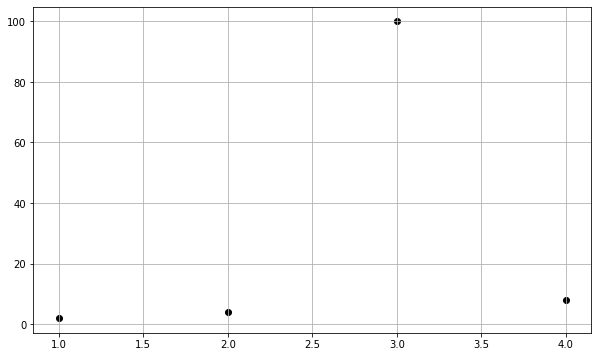

In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.metrics import mean_squared_error

# datos con los cual trabajar
X = np.array([[1], [2], [3], [4]])
y = np.array([2, 4, 100, 8])  # 100 es un outlier

# visualicemos los datos en un scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black')
plt.grid(True)
plt.show()

In [2]:
# Crear modelo de regresión lineal y ajustarlo a los datos
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# obtener metrica de evaluacion
y_pred_lin = lin_reg.predict(X)
mse = mean_squared_error(y, y_pred_lin)

# Crear modelo de regresión Huber y ajustarlo a los datos. Asignamos un epsilon de 1.35
huber = HuberRegressor(epsilon=1.35)
huber.fit(X, y)

# obtener metrica de evaluacion
y_pred_huber = huber.predict(X)
mse_huber = mean_squared_error(y, y_pred_huber)

# Mostrar coeficientes de cada modelo junto a su metrica de evaluacion
print(f"Linear Regression: w = {lin_reg.coef_[0]:.2f}, b = {lin_reg.intercept_:.2f}")
print(f"Huber Regression:  w = {huber.coef_[0]:.2f}, b = {huber.intercept_:.2f}")
print(f"MSE (Linear): {mse:.2f}")
print(f"MSE (Huber):  {mse_huber:.2f}")

Linear Regression: w = 11.40, b = 0.00
Huber Regression:  w = 2.00, b = -0.00
MSE (Linear): 1546.30
MSE (Huber):  2209.00


> Vemos que el modelo de regresion lineal entrenado presenta los parametros $w = 11.40$ y $b=0$. Mientras que el modelo Huber presenta como parametros $w = 2$ y $b=0$

> El $MSE$ de la regresion Huber es mayor que el de la regresion lineal. Sin embargo, este se ajusta mejor a la mayoria de los datos como veremos en la siguiente grafica

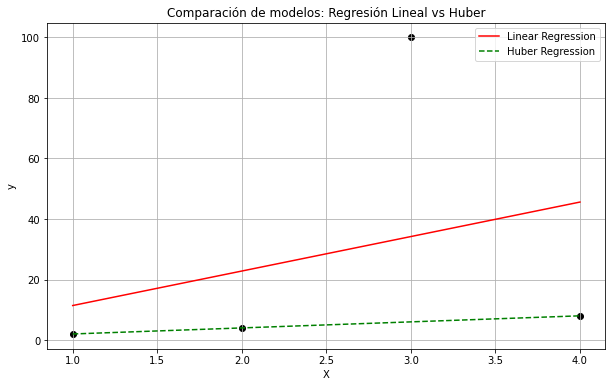

In [3]:
# Visualización de ambos modelos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black')
plt.plot(X, y_pred_lin, label='Linear Regression', color='red')
plt.plot(X, y_pred_huber, label='Huber Regression', color='green', linestyle='--')
plt.title('Comparación de modelos: Regresión Lineal vs Huber')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

> A pesar que la regresion Huber presenta un error mayor, se ajusta mejor a la tendencia de la mayoria de los datos.

> Se evidencia que la regresion lineal es sensible a la presencia de outliers ya que sesga el ajuste del modelo hacia estos valores.

## Cuando usar

- Cuando conoces que los datos contienen outliers, errores o ruido no representativo.

- Cuando requieres de una penalizacion suave sobre los outliers, sin dejarlos de considerar.

- Cuando la cantidad de outliers es pequena.

## Implementacion con Scikit Learn

En el siguiente ejemplo vamos a comparar la regresion lineal con la regresion Huber y mostrar las ventajas de utilizar esta ultima ante la presencia de outliers. Analizaremos un conjunto de 100 datos artificiales entre los cuales se encuentran 5 outliers y evaluaremos el rendimiento de ambos modelos.

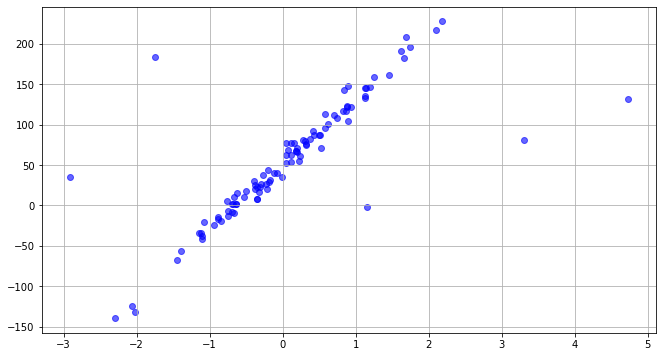

In [4]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression
import random


# Semillas para reproducibilidad
np.random.seed(42)

# Generar datos artificiales con comportamiento lineal
X, y = make_regression(n_samples=100, n_features=1, noise=10, bias=50, random_state=1)

# Agregar outliers a las primeras 5 muestras en X
for i in range(5):
    factor = random.randint(2, 4)
    if random.random() > 0.5:
        X[i] += factor * X.std()
    else:
        X[i] -= factor * X.std()

# mostrar los datos en un scatterplot
fig, ax = plt.subplots(figsize=(11, 6))
ax.scatter(X, y, label="Datos", color='blue', alpha=0.6)
ax.grid(True)
plt.show()

In [5]:

# Crear modelos y ajustarlo a los datos
lr = LinearRegression()
huber = HuberRegressor(epsilon=1)

# ajustar modelos
lr.fit(X, y)
huber.fit(X, y)

# obtener predicciones de ambos modelos
y_pred_lr = lr.predict(X)
y_pred_huber = huber.predict(X)

# Métricas para evaluar los modelos
# MSE
mse_lr = mean_squared_error(y, y_pred_lr)
mse_huber = mean_squared_error(y, y_pred_huber)
# MAE
mae_lr = mean_absolute_error(y, y_pred_lr)
mae_huber = mean_absolute_error(y, y_pred_huber)
# R2
r2_lr = r2_score(y, y_pred_lr)
r2_huber = r2_score(y, y_pred_huber)

print("Regresión Lineal")
print("MSE:", mse_lr)
print('MAE:', mae_lr )
print("R2:", r2_lr)

print("\nRegresión Huber")
print("MSE:", mse_huber)
print('MAE:', mae_huber)
print("R2:", r2_huber)

Regresión Lineal
MSE: 2011.8103345799
MAE: 28.371985214976657
R2: 0.6203999180831943

Regresión Huber
MSE: 2863.662197860665
MAE: 18.058351118533537
R2: 0.45966755105820545


> Una metrica mejor para comparar el rendimiento de ambos modelos es $MAE$. Vemos que la regresion Huber presenta un $MAE$ mucho menor que la regresion lineal indicando un mejor ajuste a los datos

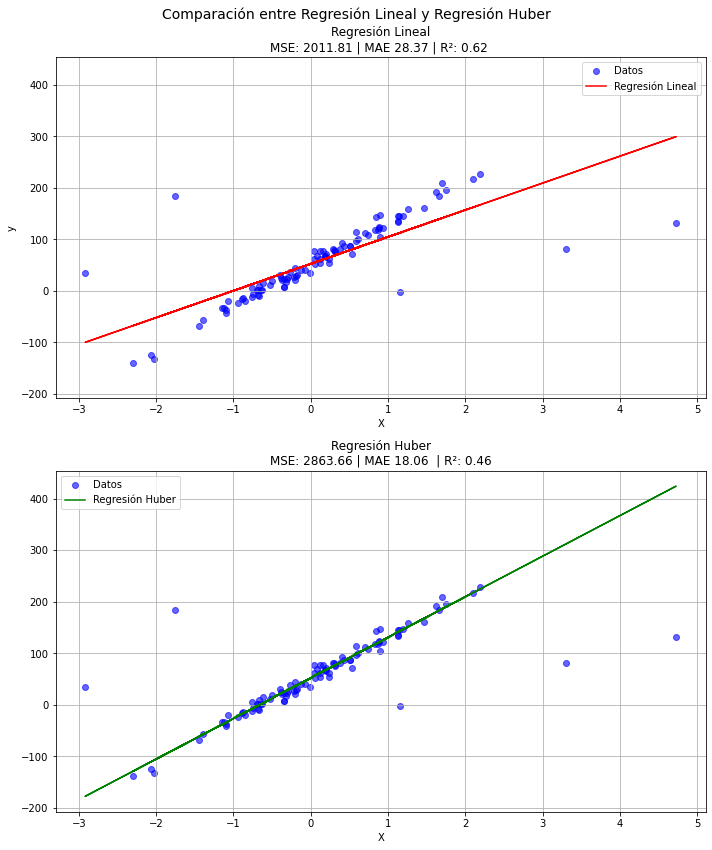

In [6]:
# Visualización de los modelos
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharey=True)

# Subgráfica Regresión Lineal
axes[0].scatter(X, y, label="Datos", color='blue', alpha=0.6)
axes[0].plot(X, y_pred_lr, color='red', label="Regresión Lineal")
axes[0].set_title(f"Regresión Lineal\nMSE: {mse_lr:.2f} | MAE {mae_lr:.2f} | R²: {r2_lr:.2f} ")
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].legend()
axes[0].grid(True)

# Subgráfica Regresión Huber
axes[1].scatter(X, y, label="Datos", color='blue', alpha=0.6)
axes[1].plot(X, y_pred_huber, color='green', label="Regresión Huber")
axes[1].set_title(f"Regresión Huber\nMSE: {mse_huber:.2f} | MAE {mae_huber:.2f}  | R²: {r2_huber:.2f}")
axes[1].set_xlabel("X")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("Comparación entre Regresión Lineal y Regresión Huber", fontsize=14)
plt.tight_layout()
plt.show()

> Las graficas muestran que la regresion lineal es sensible a la presencia de outliers, mientras que la regresion Huber es mas resistente a estos valores

> A pesar de haber outliers, la regresion Huber sigue la tendencia de la mayoria de los datos mucho mejor que la regresion lineal. 

# __Regresion RANSAC__

Conocida tambien como 'Random Sample Consensus' es un modelo robusto que no intenta ajustarse a todos los datos. RANSAC busca distinguir entre inliers (datos que siguen la tendencia) y outliers (valores atipicos) mediante el submuestreo aleatorio y repetitivo de los puntos de datos. Las veces que se repite este paso depende de la probabilidad de parada proporcionada. La forma en que trabaja este modelo es la siguiente:

1. Elige un subconjunto aleatorio de datos, podrian ser 2 que son suficientes para ajustar un modelo.

2. Ajusta el modelo a ese subconjunto.

3. Se mide que tan bien se ajusta ese modelo a todos los datos. Se calcula el error de cada punto y si alguno presenta un error mayor a un umbral se considera un inlier.

4. Se cuentan los inliers y se repite el proceso varias veces (en el orden de las 1000 veces).

5. Se selecciona el modelo con mayor numero de inliers y se reentrena usando solo los inliers.

Este modelo busca ajustar el modelo a los datos ignorando completamente los outliers mediante un preseco iterativo.

## Como funciona?

Vamos a ajustar una recta a unos datos con outliers. Los datos se muestran en la siguiente tabla:

| x | y  |
| - | -- |
| 1 | 3  |
| 2 | 5  |
| 3 | 7  |
| 4 | 9  |
| 5 | 11 |
| 6 | 50 |
| 7 | 60 |
| 8 | 70 |

Claramente vemos que los primeros 5 puntos siguen una recta con la forma $y=2x+1$ y los ultimos 3 son outliers.

__Paso 1:__

RANSAC selecciona al azar dos puntos, supongamos que son $(2, 5)$ y $(4, 9)$

__Paso 2:__

Ajusta el modelo a los datos, para ello usamos la formula de una recta con dos puntos para calcular los parametros $m$ y $b$ :

$$m = \frac{y_2 - y_1}{x_2 - x_1} = \frac{9 - 5}{4 - 2} = 2$$

$$b = y_1 - m\cdot x_1 = 5 - 2\cdot 2 = 1$$

Entonces, el modelo ajustado dados los puntos seleccionados es:

$$y = 2x + 1$$

__Paso 3:__

Verificar que puntos se ajustan bien al modelo para ser considerados inliers. Para ello, calculamos el error de cada punto mediante la siguiente ecuacion:

$$error = \left | y_{real} - y_{modelo}\right |$$


Elegimos como umbral de error 1. Debemos tener en cuenta que este valor es asignado por nosotros y no por el algoritmo. En la siguiente tabla se muestra el calculo del error de cada punto junto a su clasificacion

| x | y\_real | y\_modelo=2x+1 | error | ¿error ≤ 1? |
| - | ------- | -------------- | ----- | -------------------- |
| 1 | 3       | 3              | 0     | ✅                    |
| 2 | 5       | 5              | 0     | ✅                    |
| 3 | 7       | 7              | 0     | ✅                    |
| 4 | 9       | 9              | 0     | ✅                    |
| 5 | 11      | 11             | 0     | ✅                    |
| 6 | 50      | 13             | 37    | ❌                    |
| 7 | 60      | 15             | 45    | ❌                    |
| 8 | 70      | 17             | 53    | ❌                    |

El modelo logra detectar 5 puntos como inliers y solo 3 como outliers.

__Paso 4:__

Iterar el proceso anterior varias veces. Repetimos el proceso con diferentes pares de puntos aleatorios y se guarda el modelo que maximiza el numero de inliers. Supongamos que selecciona aleatoriamente los puntos $(6, 50)$ y $(7, 60)$. Calculamos los parametros de la recta que se ajusta al par de puntos dados

$$m = \frac{y_2 - y_1}{x_2 - x_1} = \frac{60 - 50}{7 - 6} = 10$$

$$b = y_1 - m\cdot x_1 = 50 - 10\cdot 6 = -10$$

La recta es 

$$y = 10x - 10$$

Ahora, calculamos el error de cada punto junto a su respectiva clasiicacion

| x | y\_real | y\_modelo=10x-10 | error | error ≤ 1? |
| - | ------- | ---------------- | ----- | ----------
| 1 | 3       | 0                | 3     | ❌   |
| 2 | 5       | 10               | 5     | ❌   |
| 3 | 7       | 20               | 13    | ❌  |
| 4 | 9       | 30               | 21     | ❌ |
| 5 | 11      | 40               | 29     | ❌ |
| 6 | 50      | 50               | 0     | ✅   |
| 7 | 60      | 60               | 0     | ✅   |
| 8 | 70      | 70               | 0     | ✅   |


Este modelo solo presenta 3 inliers por lo que no es mejor que el modelo anterior cuya cantidad de inliers es de 5.

__Paso 5__

RANSAC se queda con el modelo que genero mas inliers, que en este caso fue $y = 2x + 1$, y entrena nuevamente ese modelo usando solo los inliers: ($1, 3$), ($2, 5$), ($3, 7$), ($4, 9$) y ($5, 11$)

La regresion final es la mas robusta, ignorando completamente a los outliers.

## Cuando usar?

- Cuando los datos presentan una cantidad significativa de outliers, como errores de medicion, fallos o entradas corruptas.

- Cuando se sabe que hay una estructura subyacente limpia en los datos y se requiere ignorar los datos erroneos.

- En reconocimiento de patrones en imagenes ejemplo, encontrar una linea en una imagen de borde ignorando el ruido de fondo.

## Implementacion con Scikit Learn

El siguiente ejemplo vamos a comparar la Regresion Lineal con Regresion RANSAC en presencia de outliers implementando ambos modelos con Scikit Learn. Utilizamos 100 datos artificiales y le agregamos 10 outliers que permitan realizar la comparacion de los modelos. 

In [23]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

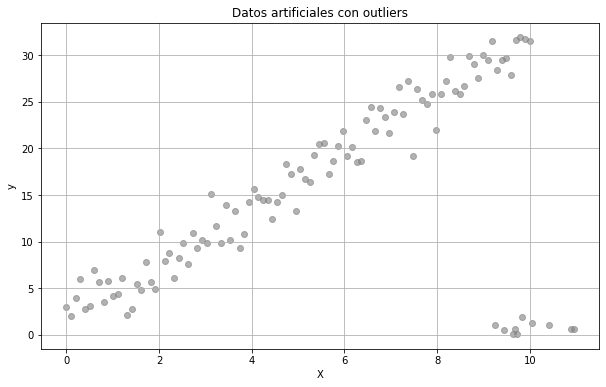

In [22]:
# Generar datos lineales con ruido
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze() + 2 + np.random.randn(100) * 2  # y = 3x + 2 + ruido

# 2. Introducir outliers
X_outliers = np.random.uniform(9, 11, 10).reshape(-1, 1)
y_outliers = np.random.uniform(0, 2, 10)
X_comb = np.vstack((X, X_outliers))
y_comb = np.hstack((y, y_outliers))

# Visualizar los datos en un scatterplot 
plt.figure(figsize=(10, 6))
plt.scatter(X_comb, y_comb, color='gray', alpha=0.6, label='Datos con outliers')
plt.title('Datos artificiales con outliers')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show()

Ahora, vamos a crear los modelos. En el modelo RANSAC, definimos el valor del parametro _residual_threshold_ el cual representa cuanto error tolera el modelo para considerar un punto como inlier.

In [24]:
# Definir y entrenar modelos
model_lr = LinearRegression()
model_ransac = RANSACRegressor(LinearRegression(), residual_threshold=3.0, random_state=42)

model_lr.fit(X_comb, y_comb)
model_ransac.fit(X_comb, y_comb)

# Obtener predicciones
y_pred_lr = model_lr.predict(X_comb)
y_pred_ransac = model_ransac.predict(X_comb)

# obtener metricas de evaluacion
mse_lr = mean_squared_error(y_comb, y_pred_lr)
mae_lr = mean_absolute_error(y_comb, y_pred_lr)

mse_ransac = mean_squared_error(y_comb, y_pred_ransac)
mae_ransac = mean_absolute_error(y_comb, y_pred_ransac)

# Mostrar métricas de cada modelo
print("----- MÉTRICAS DE EVALUACIÓN -----")
print(f"Regresión Lineal - MSE: {mse_lr:.2f} | MAE: {mae_lr:.2f}")
print(f"Regresión RANSAC - MSE: {mse_ransac:.2f} | MAE: {mae_ransac:.2f}")

----- MÉTRICAS DE EVALUACIÓN -----
Regresión Lineal - MSE: 66.34 | MAE: 5.67
Regresión RANSAC - MSE: 93.78 | MAE: 4.18


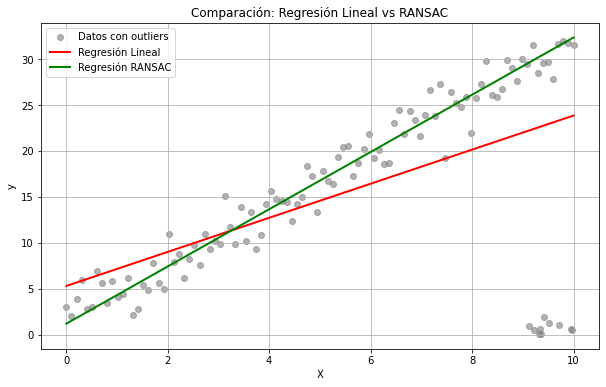

In [ ]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor

# 1. Generar datos lineales con ruido
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze() + 2 + np.random.randn(100) * 2  # y = 3x + 2 + ruido

# 2. Introducir outliers
X_outliers = np.random.uniform(9, 10, 10).reshape(-1, 1)
y_outliers = np.random.uniform(0, 2, 10)
X_comb = np.vstack((X, X_outliers))
y_comb = np.hstack((y, y_outliers))

# 3. Crear modelos
model_lr = LinearRegression()
model_ransac = RANSACRegressor(LinearRegression(), residual_threshold=3.0, random_state=42)

# 4. Entrenar modelos
model_lr.fit(X_comb, y_comb)
model_ransac.fit(X_comb, y_comb)

# 5. Predicciones
line_X = np.linspace(0, 10, 100).reshape(-1, 1)
line_y_lr = model_lr.predict(line_X)
line_y_ransac = model_ransac.predict(line_X)

# 6. Graficar resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_comb, y_comb, color='gray', alpha=0.6, label='Datos con outliers')
plt.plot(line_X, line_y_lr, color='red', linewidth=2, label='Regresión Lineal')
plt.plot(line_X, line_y_ransac, color='green', linewidth=2, label='Regresión RANSAC')
plt.title('Comparación: Regresión Lineal vs RANSAC')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# __Regresion Theil-Sen__

Es un metodo robusto para ajustar un modelo de regresion lineal a un conjunto de datos que presenta outliers. A diferencia de la regresion lineal ordinaria que minimiza el error cuadratico medio (MSE) y que se ve afectada por la presencia de outliers, la regresion Theil-Sen usa la mediana para calcular la pendiente y la interseccion de la linea de regresion.

Este modelo se basa en calcular la mediana de las pendientes entre todos los pares de puntos: en lugar de enfocarse en par de puntos aleatorios, como la regresion RANSAC, considera todas las posibles combinaciones de pares y calcula la pendiente correspondiente. Esto hace que Theil-Sen sea menos sensible a los outliers y a distribuciones no normales en los datos.

Los pasos que sigue este modelo es el siguiente:

1. Calcula todas las pendientes posibles entre pares de puntos.

2. Estima la pendiente $m$ del modelo como la mediana de todas esas pendientes.

3. Calcula la interseccion $b$ como la mediana

4. Define la mejor regresion a partir de los parametros calculados: $\hat{y} = m \cdot x + b$ 

## Como funciona?

Vamos a ajustar una recta a un conjunto de datos que contiene un outlier mediante la regresion Theil-Sen. Los datos a utilizar se presentan en la siguiente tabla:

| x | y              |
| - | -------------- |
| 1 | 2              |
| 2 | 3              |
| 3 | 4              |
| 4 | 10 ← (outlier) |

Observamos la presencia de un outlier. Usando el metodo Theil-Sen, calculamos la pendiente $m$ y la interseccion $b$ mediante los siguiente pasos:

__Paso 1__

Tomamos todos los pares posibles de puntos y calculamos las pendientes de las rectas,

$$m_{ij} = \frac{y_j - y_i}{x_j - x_i}$$

- Para $(1,2)$ y $(2,3)$ tenemos, $m = \frac{3-2}{2-1} = 1$

- Para $(1,2)$ y $(3,4)$ tenemos, $m = \frac{4-2}{3-1} = 1$

- Para $(1,2)$ y $(4,10)$ tenemos, $m = \frac{10-2}{4-1} = 2.67$

- Para $(2,3)$ y $(3,4)$ tenemos, $m = \frac{4-3}{3-2} = 1$

- Para $(2,3)$ y $(4,10)$ tenemos, $m = \frac{10-3}{4-2} = 3.5$

- Para $(3,4)$ y $(4,10)$ tenemos, $m = \frac{10-4}{4-3} = 6$

__Paso 2__

Ordenamos las pendientes y obtenemos la mediana de todas como la pendiente para construir el modelo

$$[1, 1, 1, 2.67, 3.5, 6]$$

La mediana en este caso viene dada por:

$$m_{m} = mediana = \frac{1 + 2.67}{2} = 1.835$$

__Paso 3__

Calculamos la interseccion $b_i$ para cada punto a partir de la pendiente calculada $m_{m}$, con la siguiente ecuacion,

$$b_i = y_i - m_{m} \cdot x_i$$

- $(1,2)$. $b_1 = 2 - 1.835 \cdot 1 = 0.165$

- $(2,3)$. $b_2 = 3 - 1.835 \cdot 2 = -0.67$

- $(3,4)$. $b_3 = 4 - 1.835 \cdot 3 = -1.505$

- $(4,10)$. $b_4 = 10 - 1.835 \cdot 4 = 2.66$

Ordenamos las intersecciones y obtenemos la mediana

$$[-1.505, -0.67, 0.165, 2.66]$$

$$b_m = \frac{-0.67 + 0.165}{2} = -0.2525$$

__Paso 4__

Definimos el modelo a partir de los parametros obtenidos. Segun lo anterior, la ecuacion del modelo lineal dado por Theil-Sen es:

$$\hat{y} = 1.835 \cdot x - 0.2525$$

---

Ahora, obtengamos el modelo de regresion lineal. Para ello, calculamos los parametros $m$ y $b$ mediante la siguiente ecuacion:

$$m = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum{(x_i - \bar{x})^2}}$$

$$b = \bar{y} - m \cdot \bar{x}$$

Utilizando los 4 puntos, obtenemos

$$m = 2.5$$

Las medias $\bar{x}$ y $\bar{y}$ vienen dadas por:

$$\bar{x} = \frac{1 + 2 + 3 + 4}{4} = 2.5$$

$$\bar{y} = \frac{2 + 3 + 4 + 10}{4} = 4.75$$

Ahora obtenemos el valor de $b$:
$$b = 4.75 - 2.5 \cdot 2.5 = -1.5$$

Finalmente, la ecuacion del modelo de regresion lineal viene dado por:

$$\hat{y}_{lineal} = 2.5 \cdot x - 1.5$$

Podemos notas, que ambas lineas tienen parametros diferentes. Sin embargo. La que mejor se ajusta a los datos regulares es la recta de Theil-Sen ($\hat{y}$). Veamos los modelos graficamente para evidenciar sus ajustes.

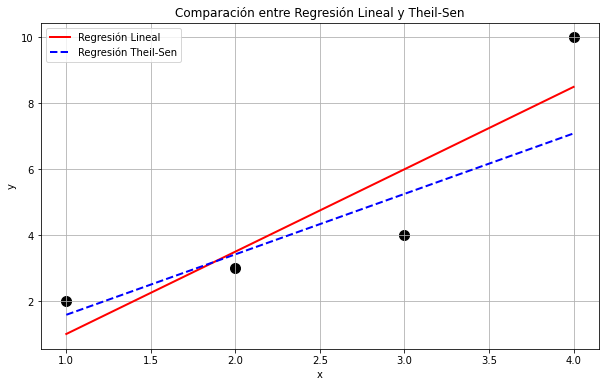

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([1, 2, 3, 4])
y = np.array([2, 3, 4, 10])

# Regresión lineal: y = 2.5x - 1.5
y_lineal = 2.5 * x - 1.5

# Regresión Theil-Sen: y = 1.835x - 0.2525
y_theilsen = 1.835 * x - 0.2525

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', s=100)
plt.plot(x, y_lineal, label='Regresión Lineal', color='red', linewidth=2)
plt.plot(x, y_theilsen, label='Regresión Theil-Sen', color='blue', linestyle='--', linewidth=2)

plt.title('Comparación entre Regresión Lineal y Theil-Sen')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Cuando usar?

- Cuando los datos presentan outliers leves o moderados.

- Cuando los errores no siguen una distribucion normal.

- Cuando requieres que tu modelo sea robusto sin eliminar datos manualmente.

- En conjuntos de datos pequenos o medianos debido a que computacionalemtne es mas costoso.